# Density wave of particles in the ring analysis 

The aim of this scrip is to analyze the behaviour of particles in the optical tweezers ring when they jump from one trap to another and see the propagating wave in the system when there is jamming

In [1]:
#Imports
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import scipy.optimize as spo

from tqdm import tqdm_notebook

idx = pd.IndexSlice
%matplotlib inline

from scipy.interpolate import make_interp_spline, BSpline

In [4]:
#Loading the tracking matrix from csv file 
filePath = "Coordinates_Test49_20190426.dat"
t = pd.read_csv(filePath ,sep = "\t", index_col=[0, 1])
t.sort_index()
t.head()

x           y         x0          y0           r  \
frame particle                                                              
0     0         347.996549  140.215129 -19.410221 -150.861264  152.104825   
      1         369.850460  442.583751   2.443690  151.507358  151.527064   
      2         335.427620  440.036851 -31.979150  148.960458  152.354469   
      3         411.544765  435.905654  44.137995  144.829260  151.405671   
      4         308.091328  431.054101 -59.315442  139.977708  152.026578   

                   theta  time  theta_prime  theta_prime_unwrap  \
frame particle                                                    
0     0        -1.698756   0.0     4.584094            4.584094   
      1         1.554669   0.0     1.554653            1.554653   
      2         1.782269   0.0     1.782303            1.782303   
      3         1.274979   0.0     1.275215            1.275215   
      4         1.971607   0.0     1.971451            1.971451   

                d_theta_prime  theta_dot_prime  
frame particle                                  
0     0                   NaN              NaN  
      1                   NaN              NaN  
      2                   NaN              NaN  
      3                   NaN              NaN  
      4                   NaN              NaN

Text(0.5,1,'Particle Position Histogram')

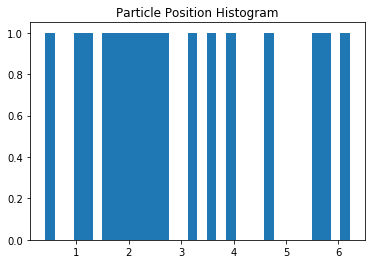

In [39]:
plt.hist(t.loc[idx[0,:],"theta_prime"], 32)
plt.title("Particle Position Histogram")

Text(0.5,1,'Particle Position Histogram')

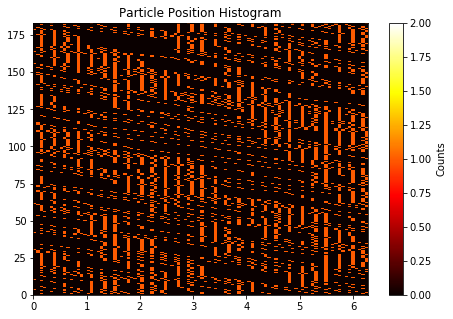

In [5]:
theta_bins = np.linspace(-np.pi,np.pi,30) #100 => particulas individuales 
fig = plt.figure(figsize = (7.5, 5))
lim = 20

cmap = plt.cm.get_cmap("hot")

plt.hist2d(t.loc[idx[:,:],"theta_prime"], t.loc[idx[:,:],"time"], bins=[100, len(t.loc[idx[:,0],"time"])], cmap =cmap)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
#cbar.set_clim(vmin=0,vmax=1)
plt.title("Particle Position Histogram")